In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [6]:
# Replace 'animals.csv' with your dataset filename
data = pd.read_csv(r'C:\Users\LENOVO THINKPAD 13\Downloads\KNN (1)\Zoo.csv')

# Preview data
data.head()



,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


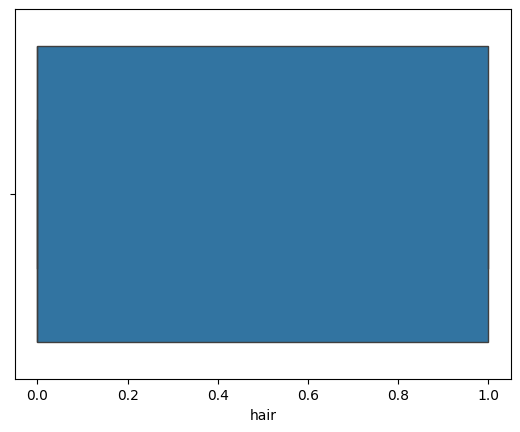

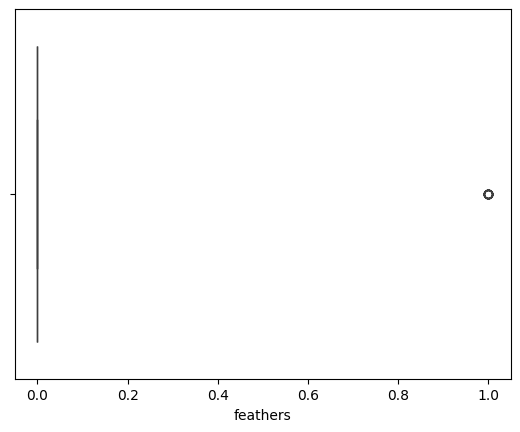

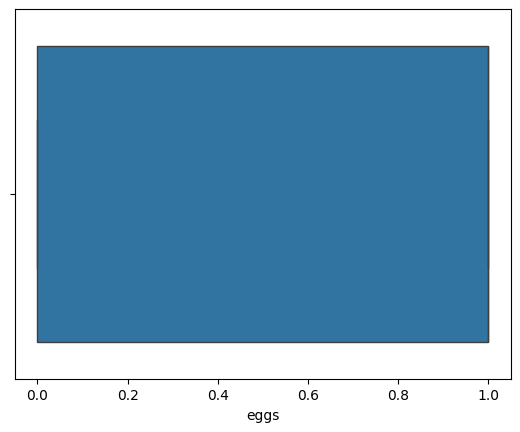

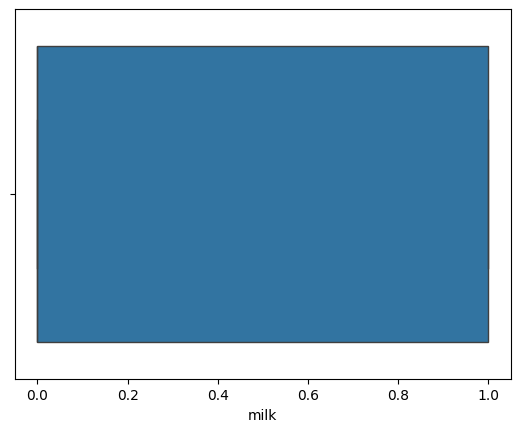

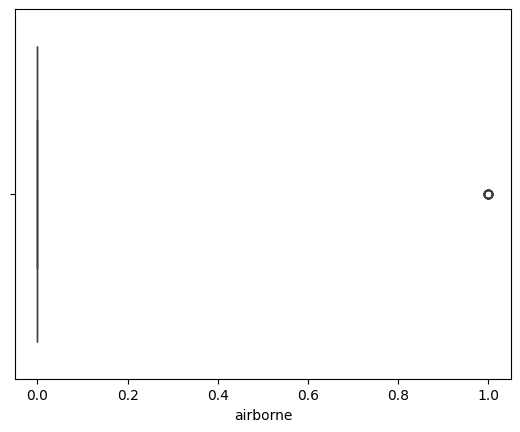

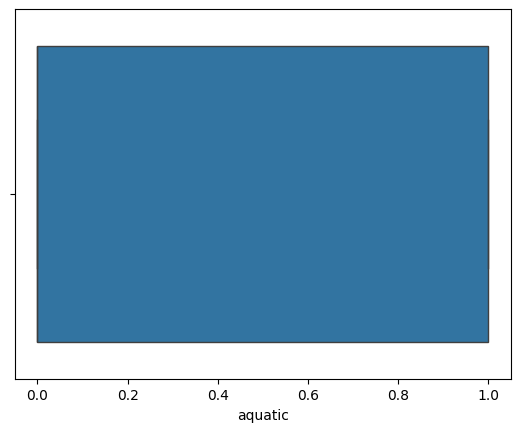

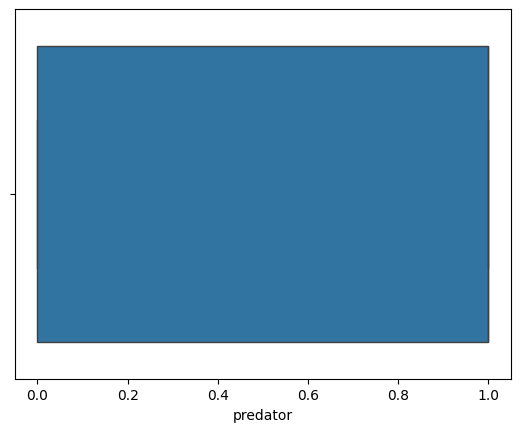

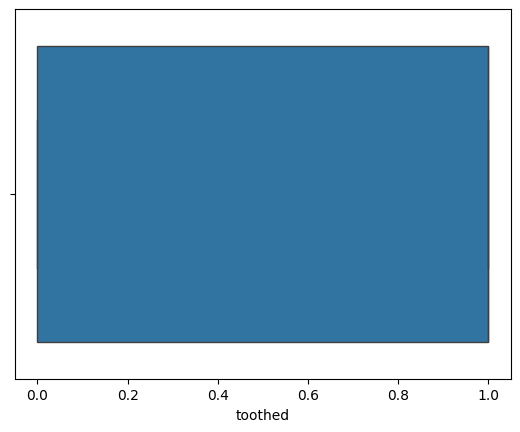

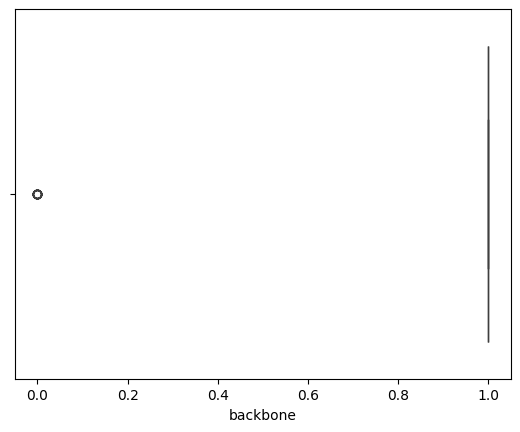

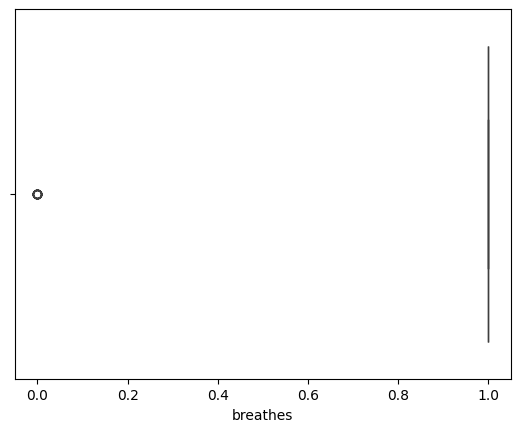

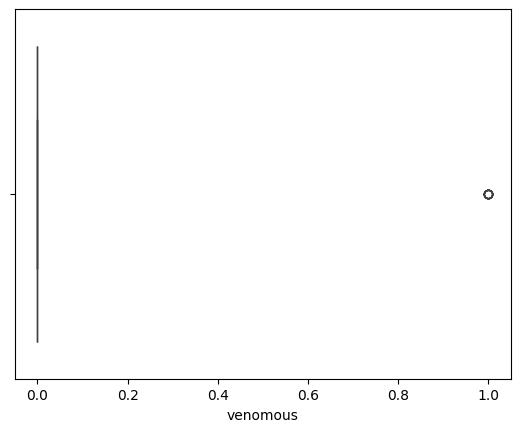

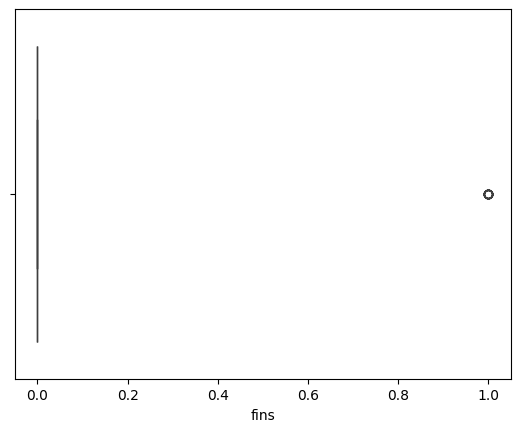

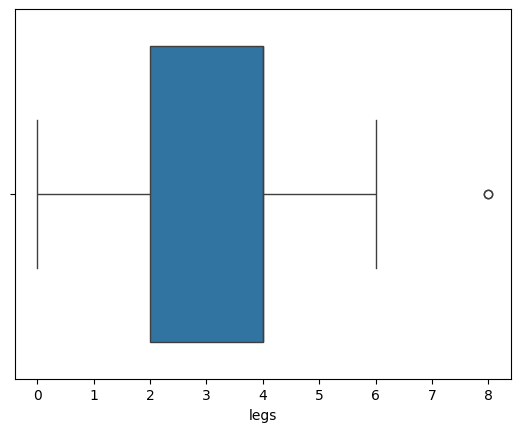

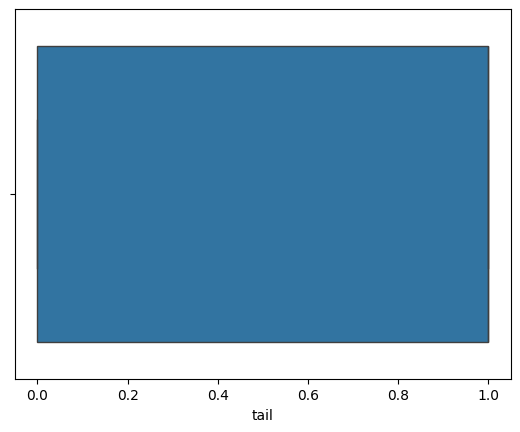

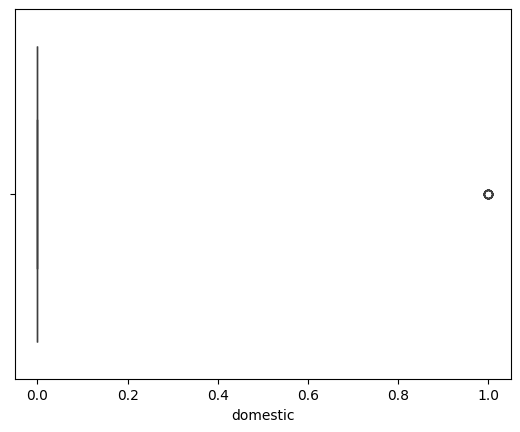

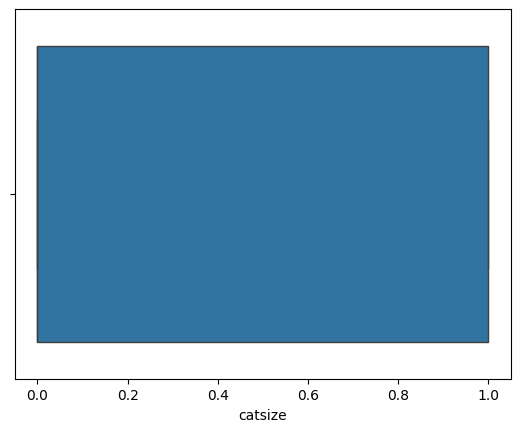

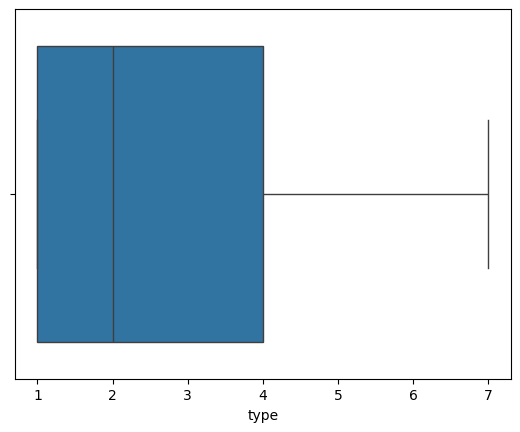

In [11]:
for col in data.select_dtypes(include=np.number).columns:
    sns.boxplot(x=data[col])
    plt.show()


In [22]:
# Numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


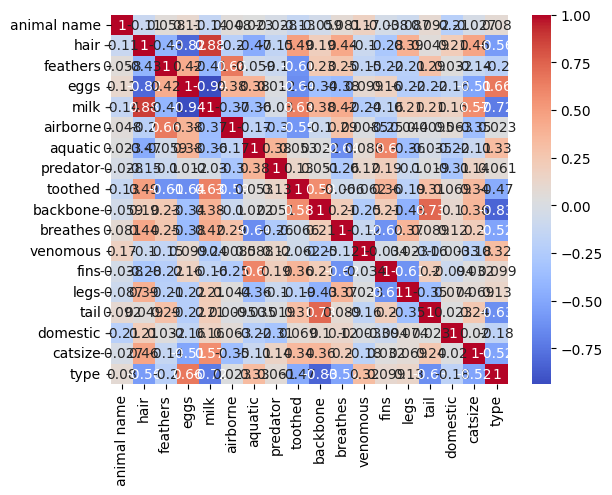

In [23]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
categorical_cols = data_encoded.select_dtypes(include='object').columns

for col in categorical_cols:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()


In [25]:
# Numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


In [28]:
# Assume 'AnimalType' is your target column
X = data.drop('eggs', axis=1)  # Features
y = data['eggs']               # Target


In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical features (if any exist)
categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now X_scaled is ready


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

k = 5  # or use sqrt(len(X_train)) as a heuristic
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [33]:
# Choose K value (usually sqrt of number of samples is a starting point)
import math
k = int(math.sqrt(len(X_train)))
print("Using K =", k)

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')  # Euclidean is default
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)


Using K = 8


Accuracy: 0.9523809523809523
Precision: 0.9576719576719577
Recall: 0.9523809523809523
F1-score: 0.952829131652661


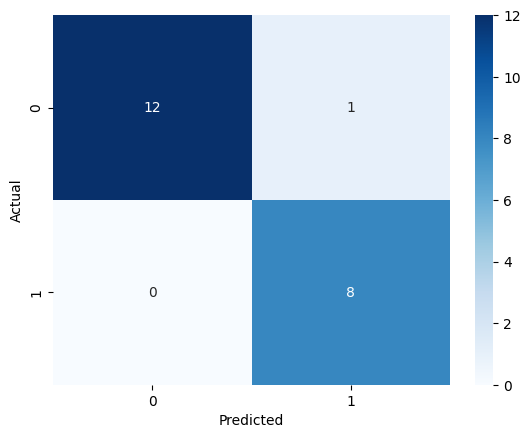

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


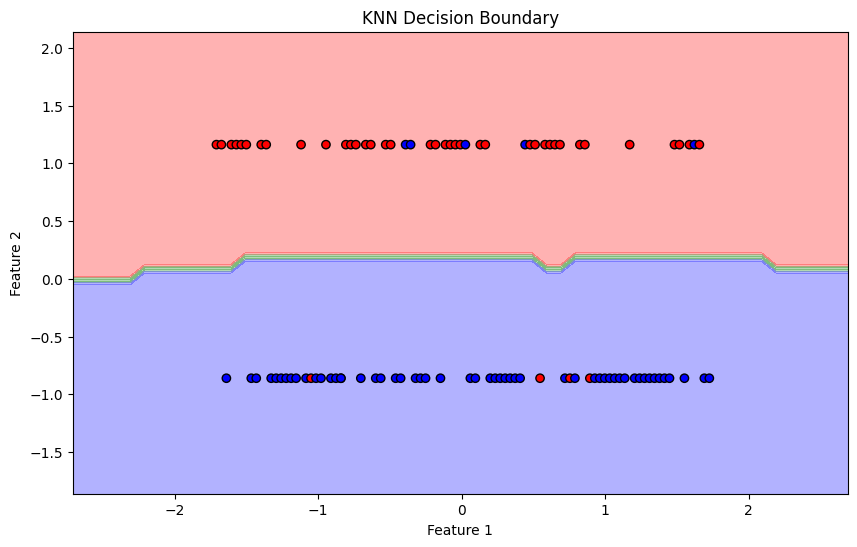

In [35]:
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]  # take first 2 features
y_vis = y

knn_vis = KNeighborsClassifier(n_neighbors=k)
knn_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red','green','blue']))
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, edgecolor='k', cmap=ListedColormap(['red','green','blue']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.show()


Interview Questions & Answers

1. What are the key hyperparameters in KNN?

n_neighbors (K): Number of neighbors to consider.

metric: Distance metric (Euclidean, Manhattan, Minkowski, etc.).

weights: Uniform or distance-based weighting of neighbors.

algorithm: Method to compute neighbors (auto, ball_tree, kd_tree, brute).

2. What distance metrics can be used in KNN?

Euclidean Distance: Straight-line distance.

Manhattan Distance: Sum of absolute differences.

Minkowski Distance: Generalization of Euclidean and Manhattan.

Hamming Distance: For categorical/binary features.

Chebyshev Distance: Maximum difference along any coordinate.